## 1. Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 2. Load Dataset 

In [4]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.  Data Exploration (EDA)

In [5]:
df.shape        # number of rows & columns
df.info()       # column datatypes + null values
df.describe()   # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/var/folders/1y/pn9x7lqd0vj4j9d589w2jl1r0000gn/T/ipykernel_13586/1172674212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df,palette="pastel")


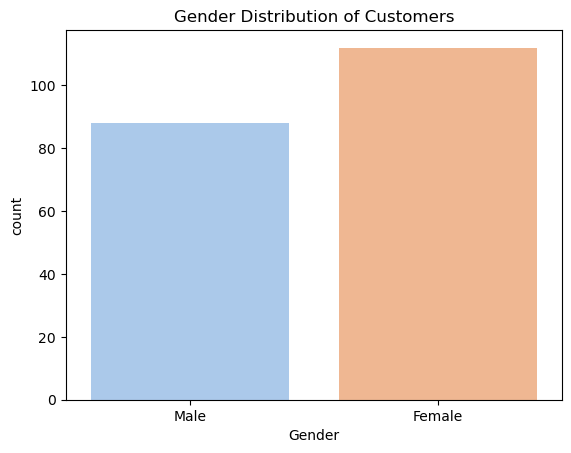

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [6]:
sns.countplot(x="Gender", data=df,palette="pastel")
plt.title("Gender Distribution of Customers")
plt.show()
df["Gender"].value_counts(normalize=True) * 100

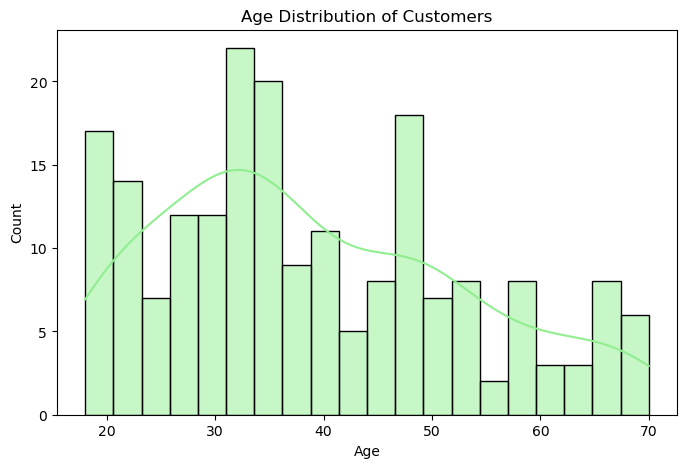

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="lightgreen")
plt.title("Age Distribution of Customers")
plt.show()

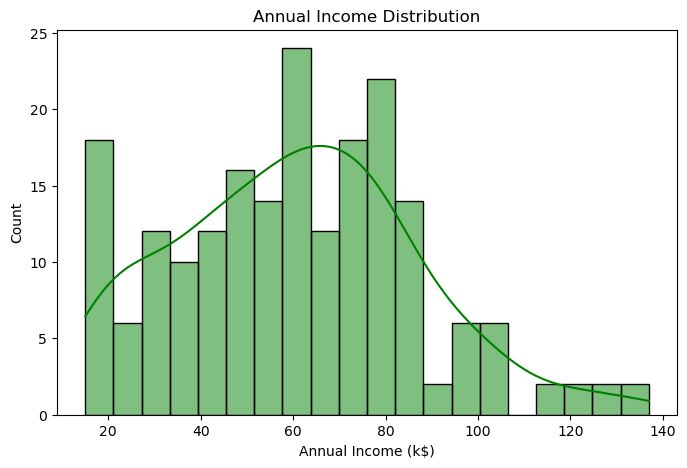

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

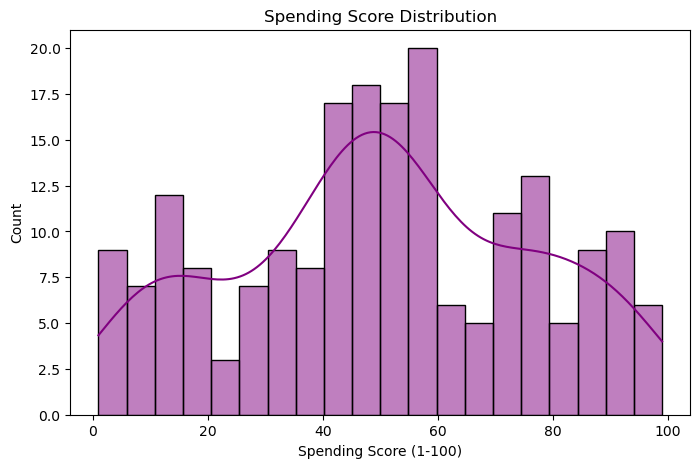

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="purple")
plt.title("Spending Score Distribution")
plt.show()

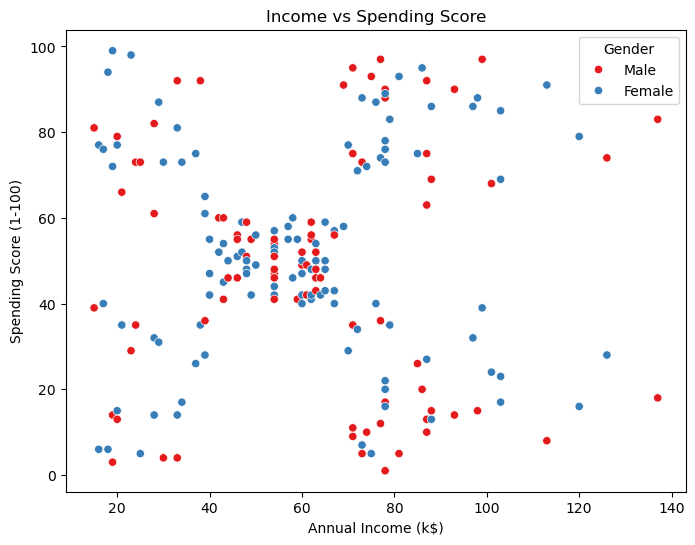

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    data=df,
    palette="Set1",
)
plt.title("Income vs Spending Score")
plt.show()

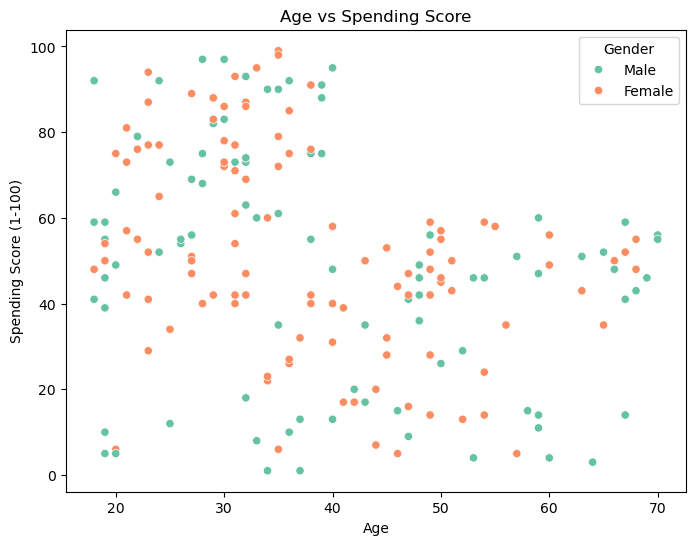

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Spending Score (1-100)", 
    data=df, 
    hue="Gender", 
    palette="Set2"
)
plt.title("Age vs Spending Score")
plt.show()

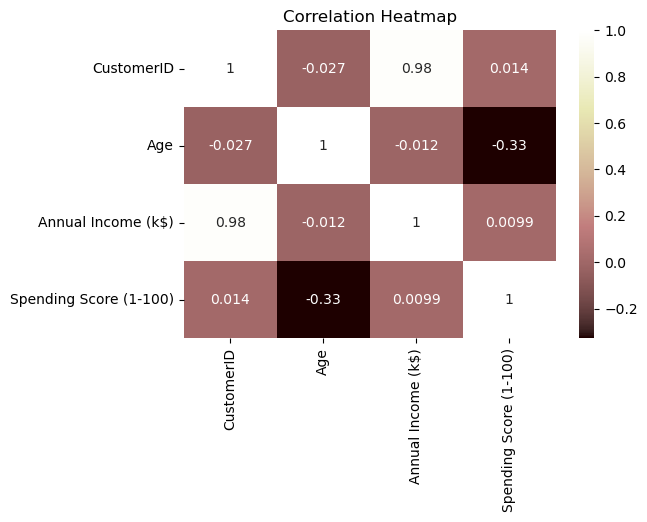

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="pink")
plt.title("Correlation Heatmap")
plt.show()

## 4. Data Preprocessing

In [13]:
df = df.drop('CustomerID',axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [15]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Choosing Optimal K 

#### Elbow Method

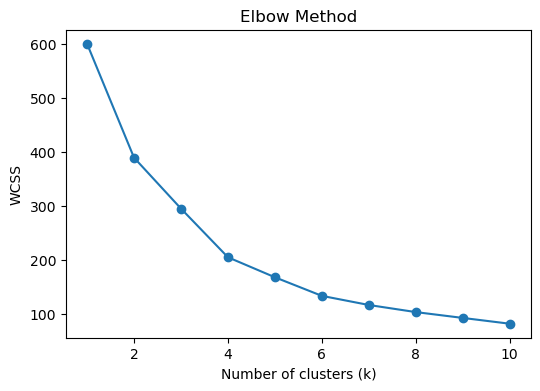

In [17]:
# Elbow Method (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Above plot :
->Before 4, WCSS decreases rapidly (meaning adding clusters improves grouping a lot).
->After 4, WCSS decreases slowly → diminishing returns.

Optimal number of Cluster = 4


In [18]:
# Silhouette Score
print("\nSilhouette Scores for different k values:")
for k in range(2, 11):   # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")


Silhouette Scores for different k values:
k = 2, Silhouette Score = 0.335
k = 3, Silhouette Score = 0.358
k = 4, Silhouette Score = 0.404
k = 5, Silhouette Score = 0.417
k = 6, Silhouette Score = 0.428
k = 7, Silhouette Score = 0.417
k = 8, Silhouette Score = 0.408
k = 9, Silhouette Score = 0.418
k = 10, Silhouette Score = 0.407


 #### Fit KMeans Models for k=4 and k=6

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# KMeans with k=4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels4 = kmeans4.fit_predict(X_scaled)

# KMeans with k=6
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
labels6 = kmeans6.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["Cluster_k4"] = labels4
df["Cluster_k6"] = labels6

#### Compare Silhouette Scores

In [38]:
score4 = silhouette_score(X_scaled, labels4)
score6 = silhouette_score(X_scaled, labels6)


print(f"Silhouette Score (k=4): {score4:.3f}")
print(f"Silhouette Score (k=6): {score6:.3f}")

Silhouette Score (k=4): 0.404
Silhouette Score (k=6): 0.428


In [22]:
import pandas as pd

# For k=4
centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=X.columns)
print("\nCluster Centers (k=4):\n", centers4)

# For k=6
centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=X.columns)
print("\nCluster Centers (k=6):\n", centers6)


Cluster Centers (k=4):
         Age  Annual Income (k$)  Spending Score (1-100)
0  1.086161           -0.490565               -0.397174
1 -0.428806            0.974847                1.216085
2 -0.962492           -0.784763                0.392030
3  0.037205            0.990115               -1.188757

Cluster Centers (k=6):
         Age  Annual Income (k$)  Spending Score (1-100)
0  1.254721           -0.240213               -0.043998
1 -0.865157           -0.131968               -0.080430
2  0.221716            1.083225               -1.290052
3 -0.441917            0.991583                1.239503
4 -0.993969           -1.347348                1.064048
5  0.478957           -1.308230               -1.196444


###  Features scaling
- The cluster centers are **z-scores** (standardized values).  
  - Mean = 0  
  - Standard Deviation = 1  
- How to read them:  
  - Positive value → above average  
  - Negative value → below average  

Example:  
- A centroid with `Age = 1.08` does **not** mean the average age is 1.08 years.  
- It means this cluster’s customers are **older than the dataset’s average age**.  

---

###  k = 4 Clusters (Elbow Method)
| Cluster | Age | Income | Spending | Interpretation |
|---------|-----|--------|----------|----------------|
| **0** | +1.08 (older) | -0.49 (low income) | -0.39 (low spending) | **Budget Seniors** → Older, low-income, low-spending customers |
| **1** | -0.43 (younger) | +0.97 (high income) | +1.21 (high spending) | **Premium Young Spenders** → Young, rich, high spenders |
| **2** | -0.96 (younger) | -0.78 (low income) | +0.39 (moderate spending) | **Impulsive Shoppers** → Young, low income, still spend |
| **3** | ~0.03 (average age) | +0.99 (high income) | -1.18 (very low spending) | **Cautious Rich** → High income but very cautious spending |

---

---

###  k = 6 Clusters (Silhouette Method)
| Cluster | Age | Income | Spending | Interpretation |
|---------|-----|--------|----------|----------------|
| **0** | +1.25 (older) | -0.24 (slightly low) | -0.04 (average spending) | **Average Older Customers** |
| **1** | -0.86 (younger) | -0.13 (around average income) | -0.08 (average spending) | **Young Middle-Class** |
| **2** | +0.22 (slightly older) | +1.08 (high income) | -1.29 (very low spending) | **Cautious Rich** |
| **3** | -0.44 (younger) | +0.99 (high income) | +1.24 (very high spending) | **Premium Young Spenders** |
| **4** | -0.99 (younger) | -1.34 (low income) | +1.06 (high spending) | **Impulse Buyers** |
| **5** | +0.48 (older) | -1.30 (low income) | -1.19 (very low spending) | **Budget Seniors** |

---

### 🔹 Comparison of k=4 vs k=6

- **k = 4 (Broad Segmentation)**  
  Groups customers into larger, more general categories.  
  -> Easy to interpret.  
  -> Good for a quick overview of the market.  
  ->  But, may hide subtle differences between customers.  

- **k = 6 (Detailed Segmentation)**  
  Breaks customers into smaller, more specific groups.  
  ->  Helps uncover hidden patterns in customer behavior.  
  -> Great for **targeted campaigns** and personalization.  
  -> Slightly more complex to explain and act on.  

 **Conclusion**:  
- For a **high-level business strategy** (like deciding product ranges or broad marketing themes), go with **k = 4**.  
- For **fine-grained insights** (like personalized offers, loyalty programs, or premium targeting), **k = 6** is better.  

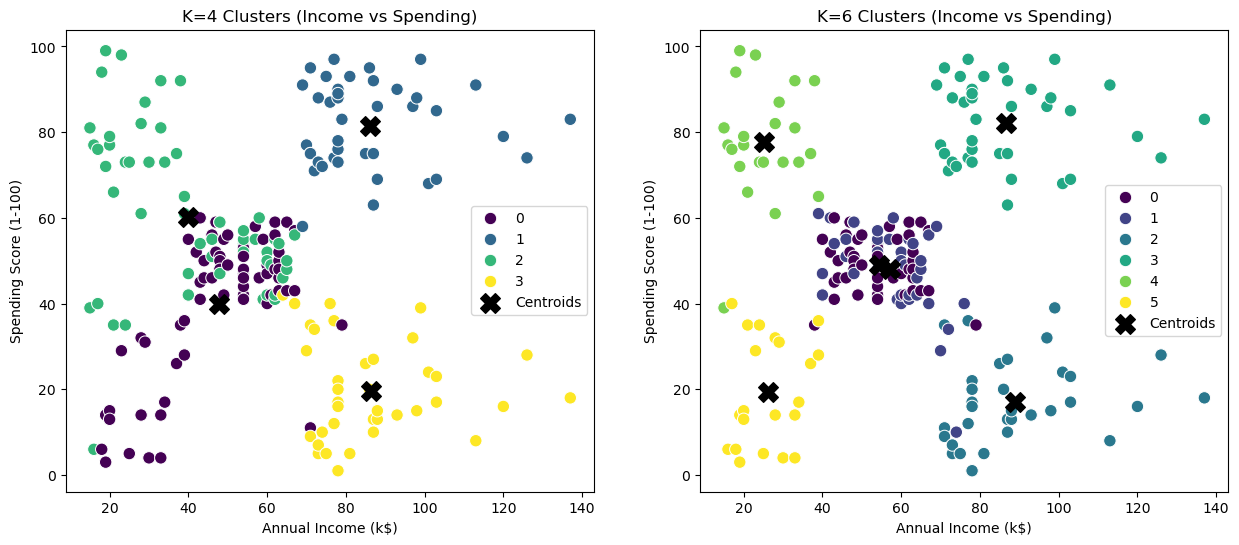

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get cluster centers back to original scale
centers4 = scaler.inverse_transform(kmeans4.cluster_centers_)
centers6 = scaler.inverse_transform(kmeans6.cluster_centers_)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# ---- Plot for k=4 ----
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster_k4", palette="viridis", data=df, s=80, ax=axes[0]
)
axes[0].scatter(
    centers4[:, X.columns.get_loc("Annual Income (k$)")],
    centers4[:, X.columns.get_loc("Spending Score (1-100)")],
    c="black", s=200, marker="X", label="Centroids"
)
axes[0].set_title("K=4 Clusters (Income vs Spending)")
axes[0].legend()

# ---- Plot for k=6 ----
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster_k6", palette="viridis", data=df, s=80, ax=axes[1]
)
axes[1].scatter(
    centers6[:, X.columns.get_loc("Annual Income (k$)")],
    centers6[:, X.columns.get_loc("Spending Score (1-100)")],
    c="black", s=200, marker="X", label="Centroids"
)
axes[1].set_title("K=6 Clusters (Income vs Spending)")
axes[1].legend()

plt.show()

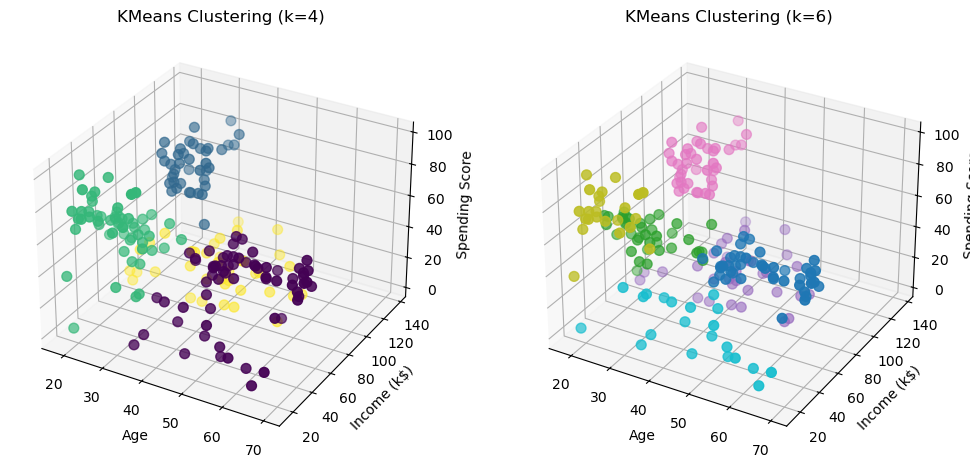

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Plot for k=4
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster_k4"], cmap="viridis", s=50)
ax1.set_title("KMeans Clustering (k=4)")
ax1.set_xlabel("Age")
ax1.set_ylabel("Income (k$)")
ax1.set_zlabel("Spending Score")

# 3D Plot for k=6
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster_k6"], cmap="tab10", s=50)
ax2.set_title("KMeans Clustering (k=6)")
ax2.set_xlabel("Age")
ax2.set_ylabel("Income (k$)")
ax2.set_zlabel("Spending Score")

plt.show()